# Clustering



In this work we will use two clustering methods K-means and DBSCAN to compare them using the Iris dataset: https://www.kaggle.com/datasets/uciml/iris/data

Fist we will do an "ETL," which stands for Extract, Transform, and Load.

With this we visualize the data and transforme it according to our needs

Unsupervised machine learning algorithms operate without the need for labeled data during training. Instead, they analyze input data independently, uncovering patterns or structures without explicit guidance. Clustering is a common unsupervised approach that groups similar data points based on their features, with examples including K-Means and DBSCAN algorithms. In essence, unsupervised learning is instrumental in exploring data structure, unveiling hidden patterns, and preprocessing data for tasks like classification or regression. Its utility shines particularly in scenarios where labeled data is scarce or unavailable.

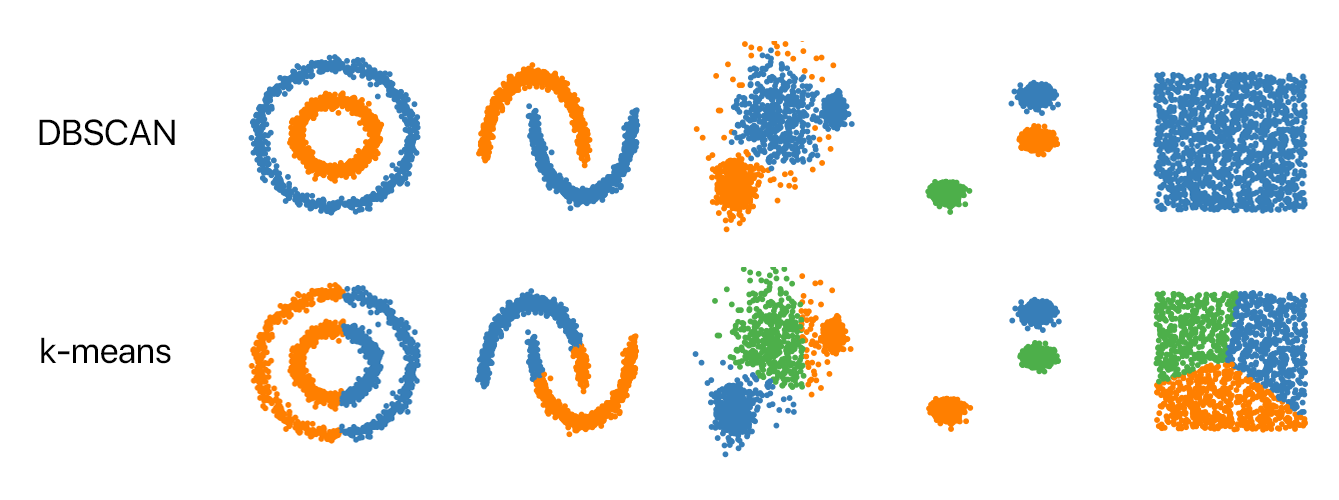

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.drop(columns="Id",axis=1,inplace=True)

In [ ]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Data Analysis

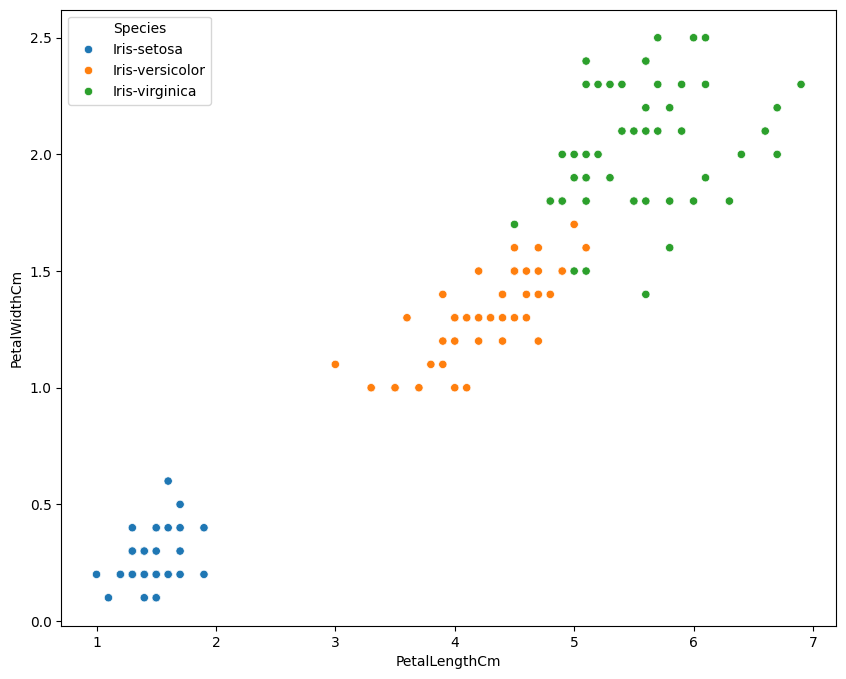

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species", palette="tab10")
plt.show()

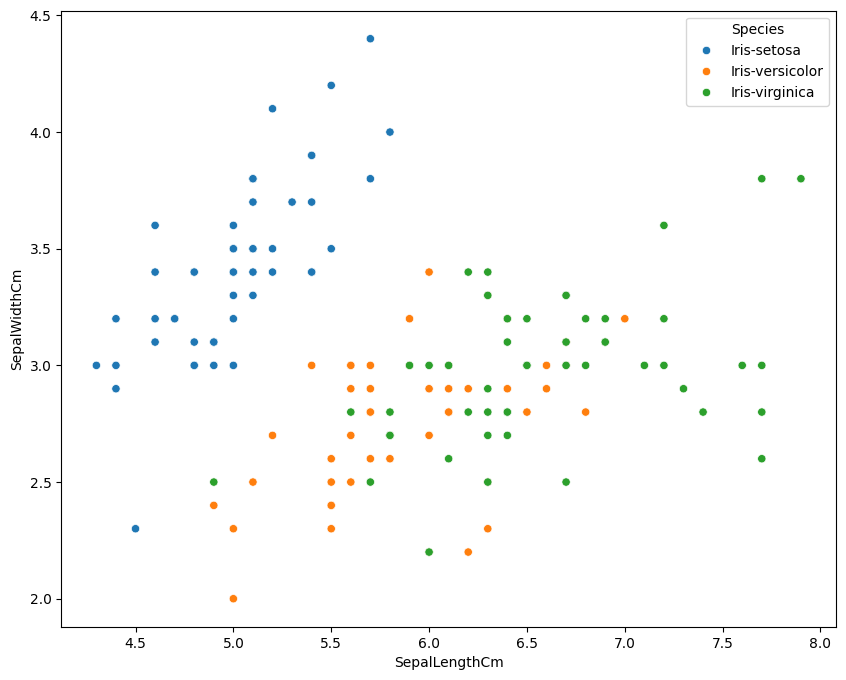

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species", palette="tab10")
plt.show()

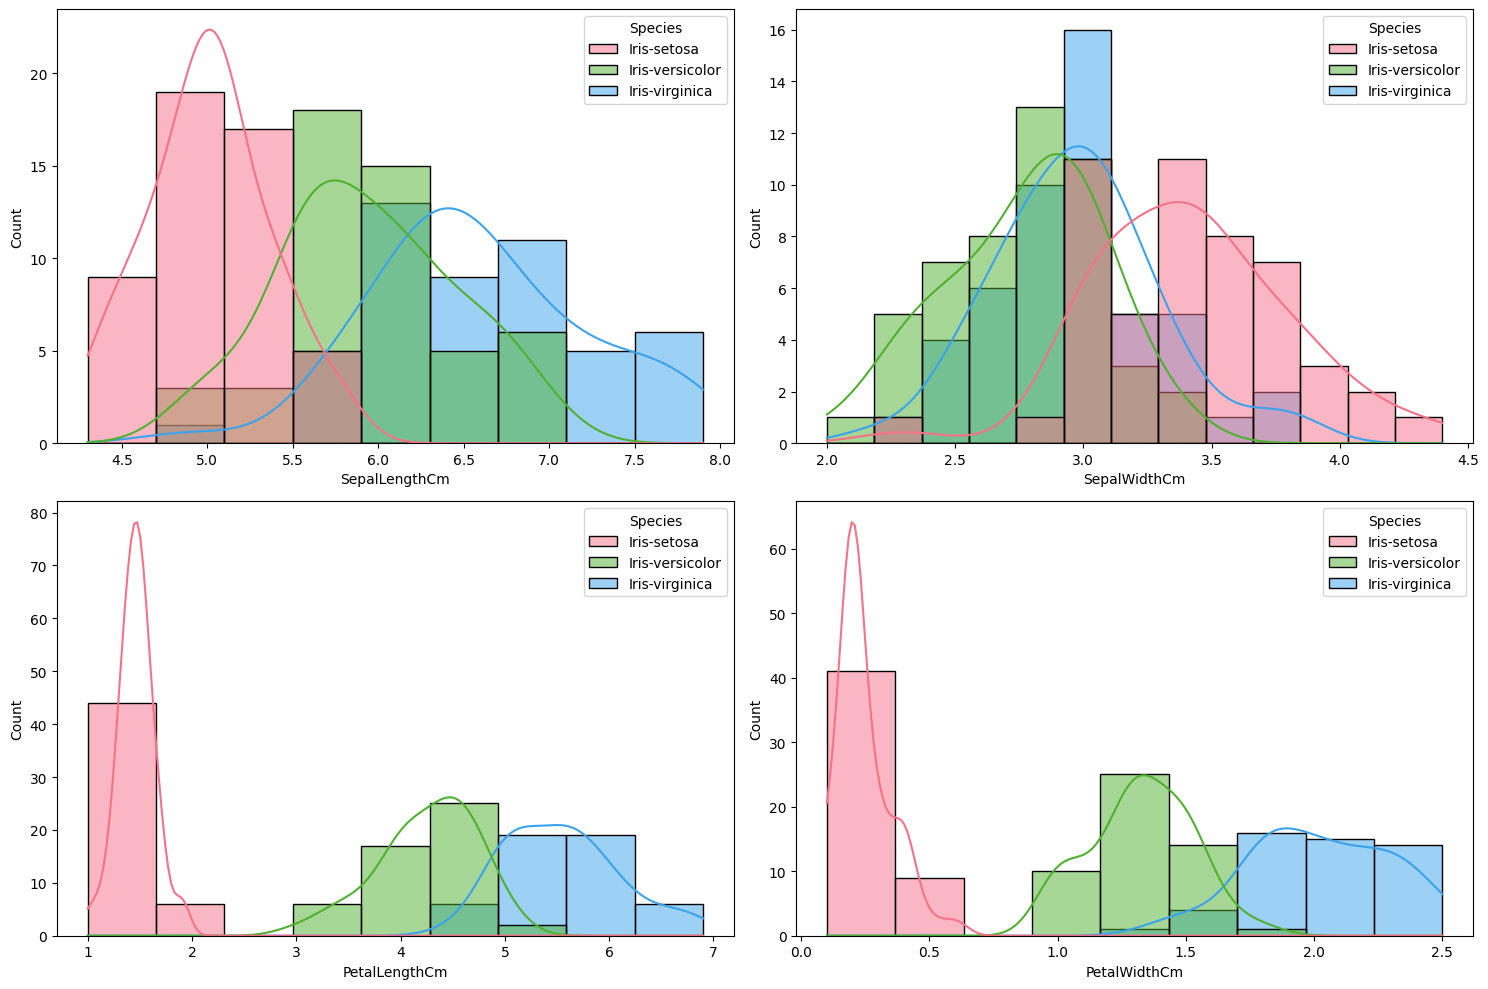

In [ ]:
plt.figure(figsize=(15, 10))
features = df.drop(columns="Species")

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature, hue="Species", kde=True, palette="husl")

plt.tight_layout()
plt.show()

# K-means

K-means is an iterative algorithm that aims to categorize a dataset into a predetermined number of clusters, denoted as 'K'. Each cluster represents a distinct subgroup where each data point belongs to one and only one cluster. The algorithm's goal is twofold: first, to make sure that data points within each cluster are as similar as possible, and second, to maximize the dissimilarity between clusters, ensuring they are distinct from each other. It achieves this by iteratively assigning data points to the cluster whose centroid (the mean position of all points in the cluster) is closest, minimizing the sum of squared distances between data points and centroids. The ultimate aim is to create homogeneous clusters, where the variation within clusters is minimized, indicating that data points within the same cluster share similar characteristics.

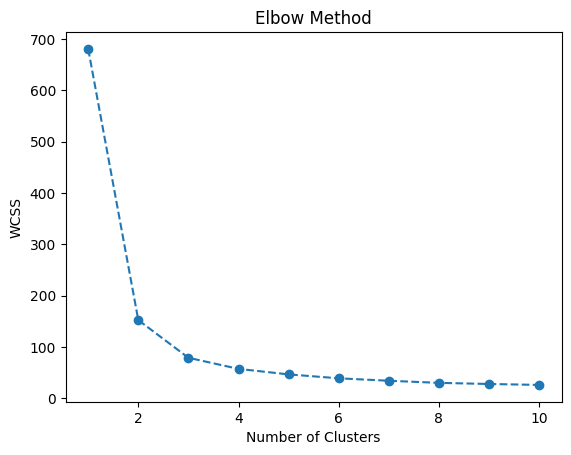

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

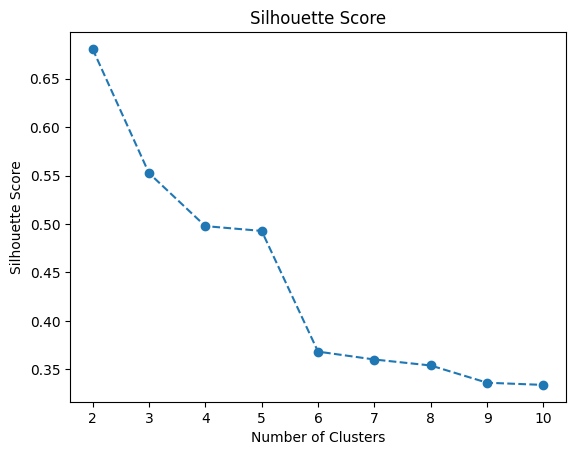

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(features)
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

We employ both the elbow method and the silhouette coefficient to determine the ideal number of clusters. In the elbow method, we identify the cluster count where the graph's slope begins to decrease significantly. With the silhouette coefficient, we aim to pinpoint a cluster number between our specified range of 2 to 11, achieving the highest silhouette score. After evaluation, we concluded that 3 clusters represented the optimal choice based on these analyses.

In [ ]:
# Define the KMeans object with desired parameters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Assuming 'df' is your DataFrame and you want to use columns 0, 1, 2, and 3 as features
x = df.iloc[:, [0, 1, 2, 3]].values

# Fit KMeans clustering model and predict cluster labels
y_kmeans = kmeans.fit_predict(x)

# y_kmeans contains the predicted cluster labels for each data point
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
df_kmean = df.copy()

In [ ]:
label  = pd.DataFrame(y_kmeans, columns= ['label'])
label.head()

,label
0,1
1,1
2,1
3,1
4,1


In [ ]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


Here, we observe that the data has been clustered into different categories compared to its original classification. Specifically, we obtained 62 instances for Iris-versicolor, 50 for Iris-setosa, and 38 for Iris-virginica. Notably, some values from Iris-versicolor and Iris-virginica were mixed together, while Iris-setosa remained unchanged. Despite this, the clustering algorithm was successful in grouping the iris types closely resembling the original distribution.



In [ ]:
df_kmean.label.value_counts()

label
0    62
1    50
2    38
Name: count, dtype: int64

In [ ]:
# Get unique numerical labels in the "Species" column
unique_species_labels = df_kmean["Species"].unique()

# Map numerical labels to species names
label_to_species = {}
for label in unique_species_labels:
    species_name = df_kmean[df_kmean["Species"] == label]["label"].iloc[0]
    label_to_species[label] = species_name

# Print the mapping
print("Species Name -> Numerical Label:")
for label, species in label_to_species.items():
    print(label, "->", species)

Species Name -> Numerical Label:
Iris-setosa -> 1
Iris-versicolor -> 0
Iris-virginica -> 2


# Data Visualization K-means

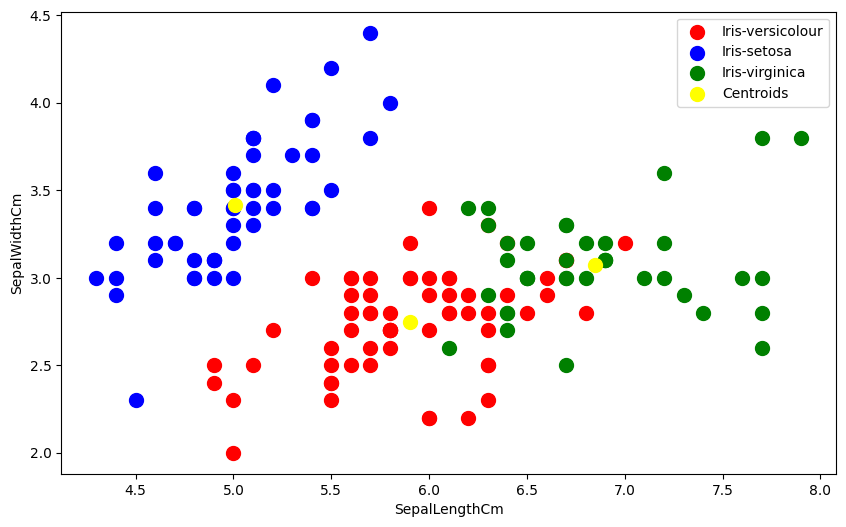

In [ ]:
# Get feature names from the DataFrame
feature_names = df.columns[[0, 1]]

# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

# Add labels to the axes using feature names
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.legend()
plt.show()

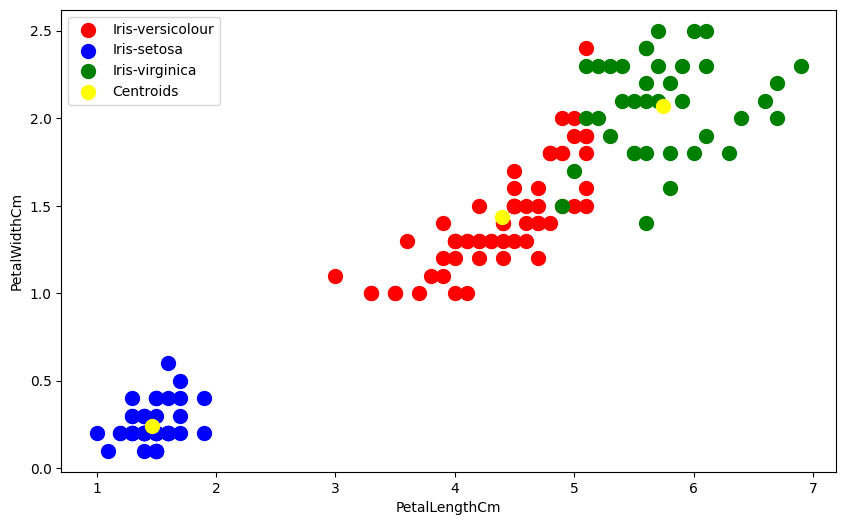

In [ ]:
# Get feature names from the DataFrame
feature_names = df.columns[[2, 3]]

# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3],
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3],
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3],
            s = 100, c = 'yellow', label = 'Centroids')

# Add labels to the axes using feature names
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.legend()
plt.show()

In [ ]:
# Define the mapping dictionary
species_mapping = {
    'Iris-setosa': 1,
    'Iris-versicolor': 0,
    'Iris-virginica': 2
}

# Apply the mapping to the "Species" column
df['Species'] = df['Species'].map(species_mapping)

# Display the first few rows of the DataFrame
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
from sklearn.metrics import classification_report

y_true = df["Species"].values

def reorder_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(len(np.unique(y_pred))):
        mask = (y_pred == i)
        labels[mask] = mode(y_true[mask])[0]
    return labels

# Reorder cluster labels to match the true labels
reordered_labels = reorder_labels(y_true, y_kmeans)

# Compute classification report
report = classification_report(y_true, reordered_labels, target_names=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'])

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
                  precision    recall  f1-score   support

Iris-versicolor       0.77      0.96      0.86        50
    Iris-setosa       1.00      1.00      1.00        50
 Iris-virginica       0.95      0.72      0.82        50

       accuracy                           0.89       150
      macro avg       0.91      0.89      0.89       150
   weighted avg       0.91      0.89      0.89       150



Based on these metrics and the clusters generated by the k-means algorithm, it's evident that the algorithm effectively grouped the data very close to the actual values. This indicates that k-means is a precise algorithm for this particular case.

# DBSCAN

DBSCAN, short for Density-Based Spatial Clustering of Applications with Noise, is an unsupervised machine learning algorithm that organizes data points into clusters based on their density or proximity. Unlike algorithms such as K-Means Clustering, DBSCAN excels in detecting outliers and forming clusters of arbitrary shapes. By focusing on dense regions and excluding points outside these regions as noise or outliers, DBSCAN mitigates the impact of outliers on cluster formation, which is a common challenge in methods like K-Means. This flexibility allows DBSCAN to handle various data distributions more effectively, making it a robust choice for clustering tasks.

In [ ]:
features=['SepalLengthCm','SepalWidthCm']

X=df[features]

X_standardized=StandardScaler().fit_transform(X)

dbscan=DBSCAN(eps=0.5,min_samples=5)
clusters=dbscan.fit_predict(X_standardized)
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

Number of clusters: 2


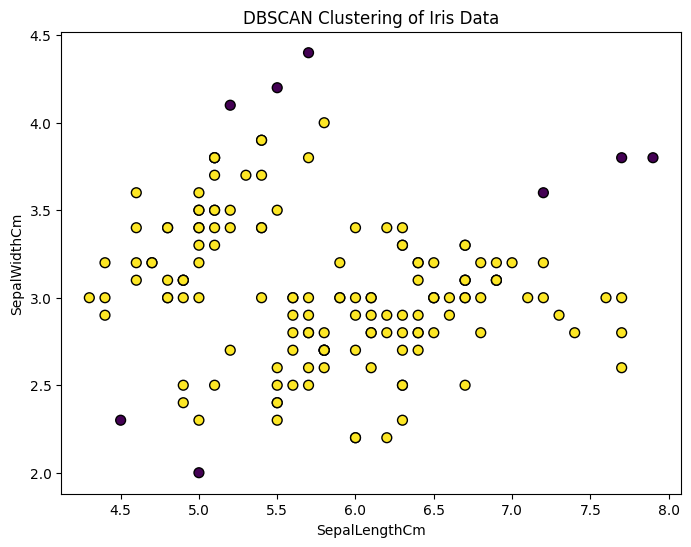

In [ ]:
centroids=pd.DataFrame(X_standardized).groupby(clusters).mean().values
unique_clusters = np.unique(clusters)
num_clusters = len(unique_clusters)

print("Number of clusters:", num_clusters)

plt.figure(figsize=(8,6))
plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'],c=clusters,cmap='viridis',edgecolors='k',s=50)
plt.title('DBSCAN Clustering of Iris Data')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.33308583847092343


We tested here sepal lenght and width.

In this DBSCAN test with Eps set to 0.5 and Min_samples to 5, we obtained two clusters. However, it merged the data into a single group alongside noise values.

Number of clusters: 3


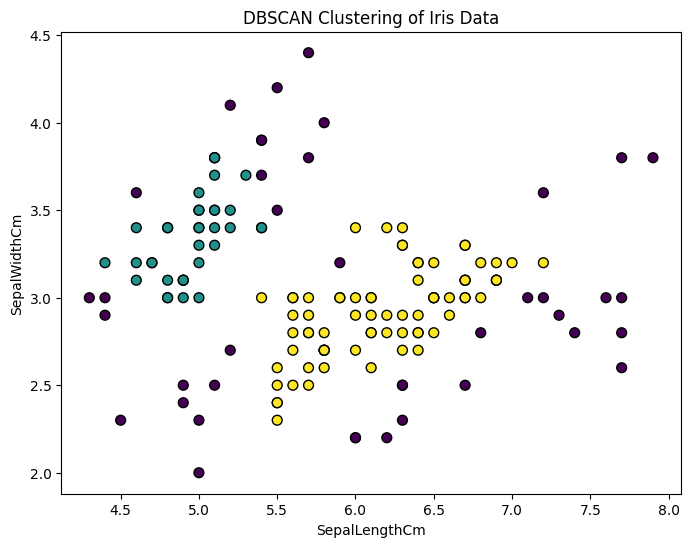

In [ ]:
dbscan=DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(X_standardized)

centroids=pd.DataFrame(X_standardized).groupby(clusters).mean().values
unique_clusters = np.unique(clusters)
num_clusters = len(unique_clusters)

print("Number of clusters:", num_clusters)

plt.figure(figsize=(8,6))
plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'],c=clusters,cmap='viridis',edgecolors='k',s=50)
plt.title('DBSCAN Clustering of Iris Data')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2824600425162137


In this iteration, setting Eps to 0.3 and Min_samples to 5 yielded three clusters. Despite the improved resemblance of the plot to the original values, we observed a lower silhouette score. This decrease likely stems from the algorithm encountering challenges in accurately grouping the dots, particularly evident in its handling of noise values.

In [ ]:
features=['PetalLengthCm','PetalWidthCm']

X=df[features]

X_standardized=StandardScaler().fit_transform(X)

dbscan=DBSCAN(eps=0.5,min_samples=5)
clusters=dbscan.fit_predict(X_standardized)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Number of clusters: 2


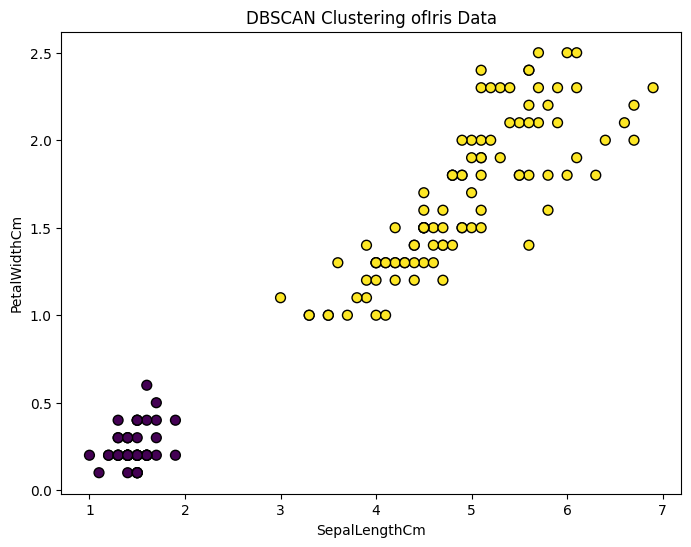

In [ ]:
centroids=pd.DataFrame(X_standardized).groupby(clusters).mean().values
unique_clusters = np.unique(clusters)
num_clusters = len(unique_clusters)

print("Number of clusters:", num_clusters)

plt.figure(figsize=(8,6))
plt.scatter(X['PetalLengthCm'],X['PetalWidthCm'],c=clusters,cmap='viridis',edgecolors='k',s=50)
plt.title('DBSCAN Clustering ofIris Data')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7667234280554557


Here we tested the petal width and lenght with DBSCAN using as parameters Eps to 0.5 and Min_samples to 0.5, we got two clusters

Number of clusters: 3


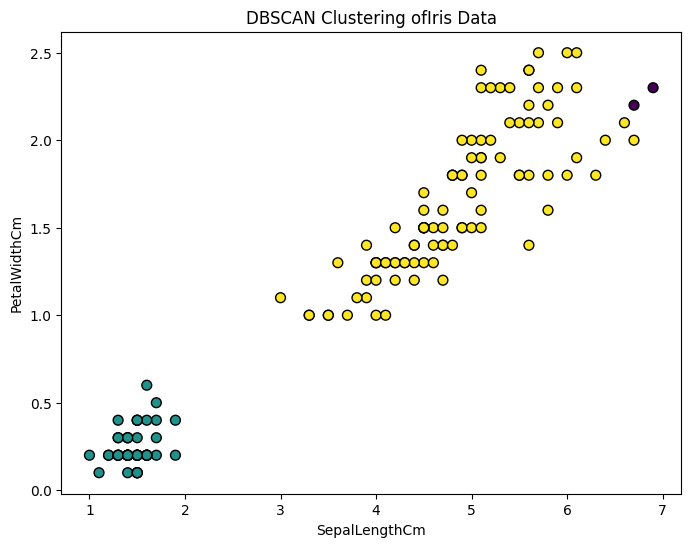

In [ ]:
dbscan=DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(X_standardized)

centroids=pd.DataFrame(X_standardized).groupby(clusters).mean().values
unique_clusters = np.unique(clusters)
num_clusters = len(unique_clusters)

print("Number of clusters:", num_clusters)

plt.figure(figsize=(8,6))
plt.scatter(X['PetalLengthCm'],X['PetalWidthCm'],c=clusters,cmap='viridis',edgecolors='k',s=50)
plt.title('DBSCAN Clustering ofIris Data')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.37589119042187596


We used Eps of 0.3 and Min_samples of 0.5 getting three clusters

# Conclusion

In this study, we observed that K-means performed better in aligning the data with the original values, whereas DBSCAN yielded lower scores and diverged more significantly from the original distribution, especially concerning petal or sepal width and length. This discrepancy can be attributed to K-means' consideration of the weight of values compared to DBSCAN's focus on density.

K-means, seeking three clusters, effectively utilized the distinct separation of sepal and petal values, as evidenced in the histogram analysis, resulting in a more accurate clustering. In contrast, DBSCAN struggled due to the close proximity of data points, leading to a density-driven separation that sometimes grouped nearby values into single clusters.

This study provided valuable insights into unsupervised algorithms, highlighting the strengths and weaknesses of both K-means and DBSCAN. While each algorithm is suited to specific problems, they collectively offer powerful tools for data clustering.